{('Warszawa', 'Gdynia'): Text(19.780943999999998, 53.381306499999994, '1'),
 ('Warszawa', 'Gdańsk'): Text(19.8236725, 53.30594, '2'),
 ('Warszawa', 'Szczecin'): Text(17.814721, 52.8380575, '3'),
 ('Warszawa', 'Olsztyn'): Text(20.757907499999998, 53.011256, '4'),
 ('Warszawa', 'Bydgoszcz'): Text(19.518929999999997, 52.683292, '5'),
 ('Warszawa', 'Toruń'): Text(19.822191, 52.63069, '6'),
 ('Warszawa', 'Poznań'): Text(18.9776925, 52.324524, '7'),
 ('Warszawa', 'Łódź'): Text(20.2488435, 52.00186050000001, '8'),
 ('Warszawa', 'Warszawa'): Text(21.030482, 52.243456, '9'),
 ('Warszawa', 'Brześć'): Text(22.371570499999997, 52.171355500000004, '10'),
 ('Warszawa', 'Praga'): Text(17.7391635, 51.159863, '11'),
 ('Warszawa', 'Radom'): Text(21.093592, 51.8245765, '12'),
 ('Warszawa', 'Lublin'): Text(21.799249500000002, 51.744504000000006, '13'),
 ('Warszawa', 'Wrocław'): Text(19.014093000000003, 51.684754500000004, '14'),
 ('Warszawa', 'Częstochowa'): Text(20.075349, 51.5277225, '15'),
 ('Warszawa'

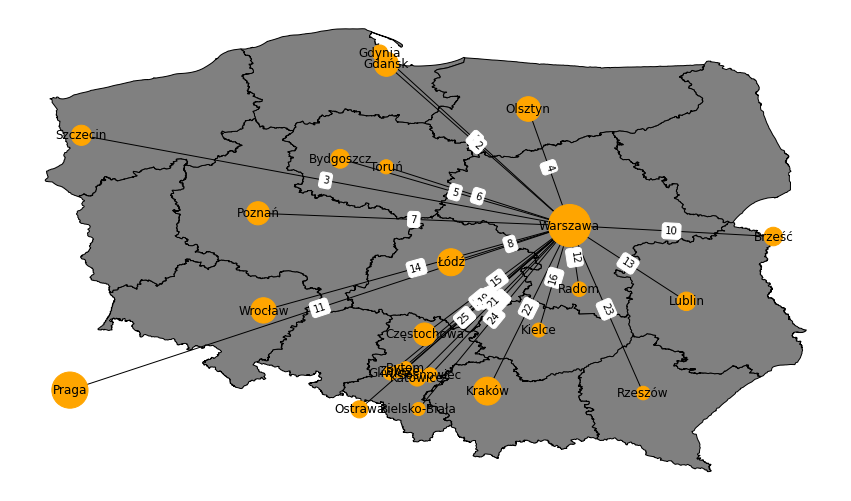

In [42]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

# mapa Polski została pobrana ze strony:
# http://www.gugik.gov.pl/pzgik/dane-bez-oplat/dane-z-panstwowego-rejestru-granic-i-powierzchni-jednostek-podzialow-terytorialnych-kraju-prg

# współrzędne geograficzne dla poszczególnych miast zostały wyszukane i spisane dzięki Google Maps

# lista z liczbą ludności (wielkość miast) została sporządzona bazując na danych z Wikipedii

m = gpd.read_file('mapa_pl/Województwa.shp')
m.plot(figsize=(15,17),
    edgecolors="black",
    color="grey")
czas= pd.read_csv('pl_podroz3.csv')
dane = pd.read_csv('miasta.csv')
gg = list(zip(czas['city'],czas['destination'],czas['drive_time']))
G2 = nx.Graph()
G2.add_weighted_edges_from(gg)
xy = list(zip(dane['y'],dane['x']))
p = list(dane['miasto'])
node_sizes = list(dane['wielkosc'])
# skalujemy powierzchnię braną na podstawie liczby ludności
for index, value in enumerate(node_sizes):
    node_sizes[index] = value / 1000

wagi = [i['weight'] for i in G2.edges.values()]
awe=nx.get_edge_attributes(G2,'weight')
pos = {i:j for i,j in zip(p,xy)}
# node_sizes = []
# node_size_custom = 0
# for n in p:
#     node_sizes.append(node_size_custom)
#     node_size_custom = node_size_custom + 100
nx.draw(G2, pos,
         node_shape='o',
         node_size=node_sizes,
         # edge_color=colors,
         node_color="orange",
         arrows=False,
         weight_size=45,
         with_labels=True)
nx.draw_networkx_edge_labels(G2,pos, edge_labels=awe)
# plt.show()
# print ("Dostepne miasta:")
# for i, v in enumerate(p):
#     print (i+1,v)
# print("Podaj miasto startu: ")
# #start=input()
# print("Podaj miasto cel: ")
# #cel=input()
# shortest_distance = nx.dijkstra_path(df, source=start, target=cel, weight='drive_time')
# print ("Twoja podróż: ")
# for i, v in enumerate(shortest_distance):
#     print (i+1, v)


